In [1]:
import pandas as pd

In [109]:
df = pd.read_csv('consumo_hamb.csv', header=None)
df.columns=['consumo']

In [20]:
df.describe()

,consumo
count,254.000000
mean,588.762283
std,105.002327
min,300.480000
25%,519.870000
50%,597.280000
75%,659.220000
max,865.790000


In [22]:
asimetria_pandas = df['consumo'].skew()
print(f"Asimetría: {asimetria_pandas}")

# Calcular y mostrar la curtosis usando pandas
curtosis_pandas = df['consumo'].kurtosis()
print(f"Curtosis): {curtosis_pandas}")

Asimetría: -0.14440590179260407
Curtosis): -0.37258628059755416


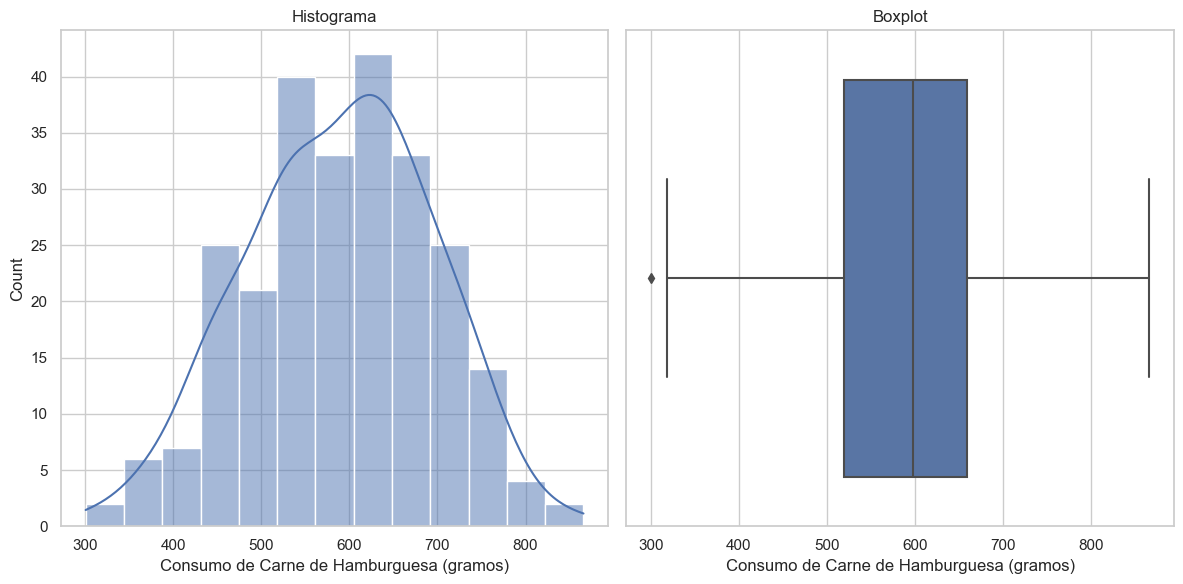

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un subplot de 1 x 2
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Graficar un histograma y un gráfico de caja para visualizar la distribución de los datos
sns.histplot(df['consumo'], kde=True, ax=ax[0])
ax[0].set_xlabel('Consumo de Carne de Hamburguesa (gramos)')
ax[0].set_title('Histograma')
sns.boxplot(x=df['consumo'], ax=ax[1])
ax[1].set_title('Boxplot')
ax[1].set_xlabel('Consumo de Carne de Hamburguesa (gramos)')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


* **Asimetría**: Los datos están sesgados levemente hacia la izquierda
* **Curtosis**: Los datos son más planos y tienen colas más ligeras que la distribución normal

--------------------------------------------- 

## Modelo con distribución normal

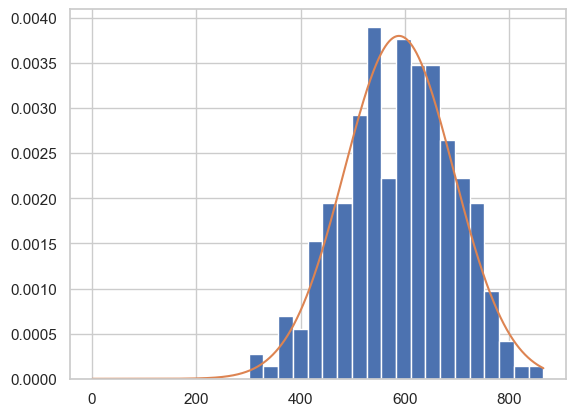

In [112]:
from scipy.stats import norm
import numpy as np 

mean = 588.762283
std = 105.002327
max = df['consumo'].max()
plt.hist(df['consumo'], bins=20, density=True)

x= np.arange(1,max,0.001)
plt.plot(x, norm.pdf(x,loc=mean,scale=std))


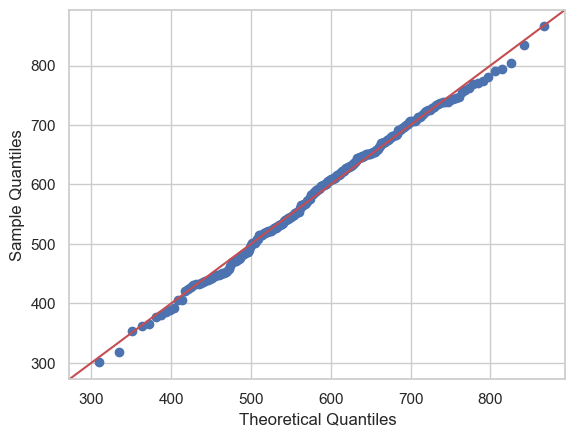

In [38]:
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.qqplot(data = df['consumo'], dist=stats.norm, loc=mean, scale=std, line="45")
plt.show()

------------------------------
## Modelo con Distribución Beta

La distribucion Beta funciona para rangos de 0,1 por lo que hay que normalizar la distribución

In [104]:
## Normalizamos la distribucion 

df_normalized = df.copy()
df_normalized['consumo'] = (df_normalized['consumo']- df['consumo'].min()) / (df['consumo'].max() - df['consumo'].min())


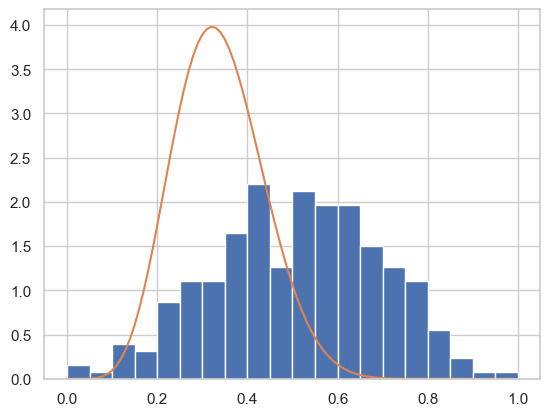

In [126]:
from scipy.stats import beta

mean = df_normalized['consumo'].mean()
std = df_normalized['consumo'].std()


alpha = (mean**2)/(std**2)
Beta = (mean)/(std**2)

plt.hist(df_normalized['consumo'], bins=20, density=True)
x= np.arange(0,1,0.01)
plt.plot(x, beta.pdf(x, alpha, Beta))


plt.show()

Encontramos que con la formula proporcionada no hay una estimación adecuada de los parámetros $\alpha$ y $\beta$, por lo que la distribución teórica no es la indicada. 

Nos dimos cuenta que usando el metodo de los momentos, se obtienen valores para $\alpha$ y $\beta$ que si se acoplan a la naturaleza de la distribución:

$$\alpha = \frac{{(\bar{x})^2 \times (1 - \bar{x})}}{{s^2}} - \bar{x} $$

$$ \beta = \alpha \times \left( \frac{1}{\bar{x}} - 1 \right) $$


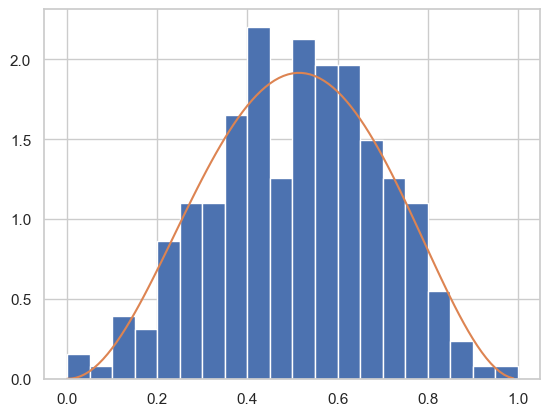

In [135]:
var = std ** 2
alpha = ((mean ** 2) * (1 - mean)) / var - mean
Beta = alpha * (1 / mean - 1)


plt.hist(df_normalized['consumo'], bins=20, density=True)
x= np.arange(0,1,0.01)
plt.plot(x, beta.pdf(x, alpha, Beta))


plt.show()

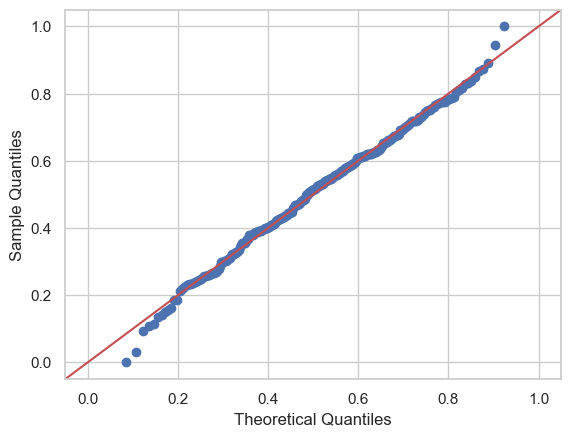

In [139]:
fig = sm.qqplot(data = df_normalized['consumo'], dist=stats.beta, distargs=(alpha,Beta), line="45")
plt.show()